In [5]:
#make sure you have installed these libraries before getting started
!pip install matplotlib
!pip install seaborn


     ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
     --- ------------------------------------ 10.2/103.3 kB ? eta -:--:--
     ---------------------- -------------- 61.4/103.3 kB 825.8 kB/s eta 0:00:01
     ------------------------------------ 103.3/103.3 kB 853.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.2/8.0 MB 5.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.0 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.0 MB 8.3 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.0 MB 13.6 MB/s eta 0:00:01
   ----------------- ---------------------- 3.5/8.0 MB 15.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.0 MB 14.6 MB/s eta 0:00:01
   ---------------------- ----------------- 4.6/8.0 MB 14.7 MB/s eta 0:00:01
   ------------------------------- -------- 6.4/8.0 MB 17.7 MB/s eta 0:00:01
   --------


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
data_path = "../data/cleaned_dataset.csv"  
df = pd.read_csv(data_path)

In [10]:
print("First few rows of the dataset:")
print(df.head())

print("\nSummary of numerical columns:")
print(df.describe())

print("\nSummary of categorical columns:")
print(df.describe(include=['object', 'category']))

First few rows of the dataset:
      CID         TID  Gender     Age Group        Purchase Date  \
0  943146  5876328741  Female         25-45  2023-08-30 20:27:08   
1  180079  1018503182    Male         25-45  2024-02-23 09:33:46   
2  337580  3814082218   Other  60 and above  2022-03-06 09:09:50   
3  180333  1395204173   Other  60 and above  2020-11-04 04:41:57   
4  447553  8009390577    Male         18-25  2022-05-31 17:00:32   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          Clothing              Yes  SEASONALOFFER21                 211.54   
3  Sports & Fitness               No         NEWYEARS                   0.00   
4  Sports & Fitness              Yes         WELCOME5                 439.92   

   Gross Amount   Net Amount Purchase Method   Location  
0    725.304000   661

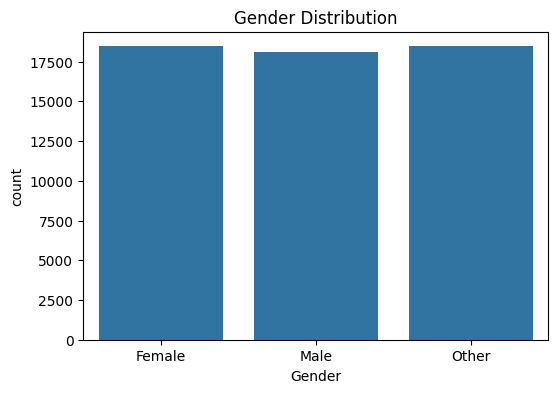

In [11]:
#analysing the customer demographics on gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()
